# Queimadas nas florestas brasileiras - 2012 a 2016

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Projeto Final - Técnicas de Programação I

### Integrantes

- Glaydson Gonçalo
- Guilherme Araújo Mendes de Souza
- Laura Busin Campos
- Miller M Monteiro

### Bases utilizadas
- **Queimadas:** https://dados.gov.br/dados/conjuntos-dados/snif
- **Informações do clima:** https://www.kaggle.com/datasets/fabiojorge/brazil-temperature-2012-2019 (separada em duas partes)

<sub>**Observação**: Devido aos seus tamanhos, as bases com informações do clima foram convertidas do formato .csv para o .parquet para que conseguíssemos subí-las no github</sub>

### Tratamento dos dados

#### Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Sigla dos estados

In [ ]:
sigla_dos_estados = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapa': 'AP', 'Amazonas': 'AM',
    'Bahia': 'BA', 'Ceara': 'CE', 'Distrito Federal': 'DF', 'Espirito Santo': 'ES',
    'Goias': 'GO', 'Maranhao': 'MA', 'Mato Grosso': 'MT', 'Mato Grosso do Sul': 'MS',
    'Minas Gerais': 'MG', 'Para': 'PA', 'Paraiba': 'PB', 'Parana': 'PR',
    'Pernambuco': 'PE', 'Piaui': 'PI', 'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN',
    'Rio Grande do Sul': 'RS', 'Rondonia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC',
    'Sao Paulo': 'SP', 'Sergipe': 'SE', 'Tocantins': 'TO'
}

#### Meses do ano

In [ ]:
meses_ano = {
    'Janeiro': 1, 'Fevereiro': 2, 'Março': 3, 'Abril': 4, 'Maio': 5, 'Junho': 6,
    'Julho': 7, 'Agosto': 8, 'Setembro': 9, 'Outubro': 10, 'Novembro': 11, 'Dezembro': 12
}

#### Leitura dos dados

In [ ]:
df_amazon = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/amazon.csv', encoding='ISO-8859-1', thousands = '.', sep = ';')
df_data_p1 = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/output_data_part1.parquet')
df_data_p2 = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/output_data_part2.parquet')

In [ ]:
df_amazon

,year,state,month,number,date
0,1998,Acre,Janeiro,0,01/01/1998
1,1999,Acre,Janeiro,0,01/01/1999
2,2000,Acre,Janeiro,0,01/01/2000
3,2001,Acre,Janeiro,0,01/01/2001
4,2002,Acre,Janeiro,0,01/01/2002
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128,01/01/2012
6450,2013,Tocantins,Dezembro,85,01/01/2013
6451,2014,Tocantins,Dezembro,223,01/01/2014
6452,2015,Tocantins,Dezembro,373,01/01/2015


#### Pré-vizualização dos dados

In [ ]:
df_amazon.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0,01/01/1998
1,1999,Acre,Janeiro,0,01/01/1999
2,2000,Acre,Janeiro,0,01/01/2000
3,2001,Acre,Janeiro,0,01/01/2001
4,2002,Acre,Janeiro,0,01/01/2002


In [ ]:
df_amazon.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128,01/01/2012
6450,2013,Tocantins,Dezembro,85,01/01/2013
6451,2014,Tocantins,Dezembro,223,01/01/2014
6452,2015,Tocantins,Dezembro,373,01/01/2015
6453,2016,Tocantins,Dezembro,119,01/01/2016


In [ ]:
df_data_p1.head()

,CodigoOMM,NomeEstacao,Estado,EstadoDesc,EstadoRegiao,Latitude,Longitude,Altitude,EstacaoStituacao,OperanteDesde,...,UmidadeRelativa,PressaoAtmEstacao,PressaoAtmMar,DirecaoVento,VelocidadeVentoInsolacao,Nebulosidade,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
0,82989,AGUA BRANCA,AL,Alagoas,Nosdeste,-9.28,-37.9,605.34,Estação Operante,05/05/1928,...,91.0,943.6,1010.2,14.0,7.0,11.3,0.0,7.8,25.92,89.0
1,82989,AGUA BRANCA,AL,Alagoas,Nosdeste,-9.28,-37.9,605.34,Estação Operante,05/05/1928,...,88.0,945.7,1012.3,5.0,5.0,NaN,1.0,NaN,NaN,NaN
2,82989,AGUA BRANCA,AL,Alagoas,Nosdeste,-9.28,-37.9,605.34,Estação Operante,05/05/1928,...,89.0,943.7,1010.1,14.0,5.0,10.5,0.0,8.4,27.26,87.0
3,82989,AGUA BRANCA,AL,Alagoas,Nosdeste,-9.28,-37.9,605.34,Estação Operante,05/05/1928,...,82.0,944.5,1010.8,5.0,7.0,NaN,3.0,NaN,NaN,NaN
4,82989,AGUA BRANCA,AL,Alagoas,Nosdeste,-9.28,-37.9,605.34,Estação Operante,05/05/1928,...,90.0,942.7,1008.7,14.0,5.0,8.9,0.0,10.5,26.68,87.0


In [ ]:
df_data_p2.head()

,CodigoOMM,NomeEstacao,Estado,EstadoDesc,EstadoRegiao,Latitude,Longitude,Altitude,EstacaoStituacao,OperanteDesde,...,UmidadeRelativa,PressaoAtmEstacao,PressaoAtmMar,DirecaoVento,VelocidadeVentoInsolacao,Nebulosidade,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
0,82791,PATOS,PB,Paraiba,Nordeste,-7.01,-37.26,249.09,Estação Operante,17/10/1975,...,53.0,981.5,1008.9,9.0,4.8,11.3,0.0,13.0,30.24,51.25
1,82791,PATOS,PB,Paraiba,Nordeste,-7.01,-37.26,249.09,Estação Operante,17/10/1975,...,56.0,985.3,1012.9,9.0,4.5,NaN,7.0,NaN,NaN,NaN
2,82791,PATOS,PB,Paraiba,Nordeste,-7.01,-37.26,249.09,Estação Operante,17/10/1975,...,33.0,980.2,1007.6,14.0,3.3,NaN,6.0,NaN,NaN,NaN
3,82791,PATOS,PB,Paraiba,Nordeste,-7.01,-37.26,249.09,Estação Operante,17/10/1975,...,58.0,982.3,1008.3,5.0,4.8,10.5,9.0,9.1,29.34,56.75
4,82791,PATOS,PB,Paraiba,Nordeste,-7.01,-37.26,249.09,Estação Operante,17/10/1975,...,60.0,985.0,1012.6,5.0,3.0,NaN,7.0,NaN,NaN,NaN


#### Tratamento do campo date do df_amazon que mostra sempre ano-01-01 independentemente do mês

In [ ]:
df_amazon = df_amazon.rename(columns={'month': 'mes', 'year': 'ano'})
df_amazon['date'] = pd.to_datetime(df_amazon['date'])

In [ ]:
df_amazon['day'] = df_amazon['date'].dt.day
df_amazon['month'] = df_amazon['date'].dt.month
df_amazon['year'] = df_amazon['date'].dt.year

In [ ]:
df_amazon['month'] = [meses_ano[mes] for mes in df_amazon['mes']]

In [ ]:
df_amazon['date'] = pd.to_datetime(df_amazon[['year', 'month', 'day']])

In [ ]:
df_amazon = df_amazon.drop(['day', 'month', 'year'], axis=1)
df_amazon = df_amazon.rename(columns={'mes': 'month', 'ano': 'year'})

#### Padronização das datas

In [ ]:
df_data_p1['Data'] = pd.to_datetime(df_data_p2['Data'], format='%d/%m/%Y', errors='coerce')
df_data_p2['Data'] = pd.to_datetime(df_data_p2['Data'], format='%d/%m/%Y', errors='coerce')

In [ ]:
df_amazon['date'] = pd.to_datetime(df_amazon['date'])
df_amazon['date'] = pd.to_datetime(df_amazon['date'], format='%d/%m/%Y')

In [ ]:
df_data_p1['Data'] = pd.to_datetime(df_data_p1['Data'])
df_data_p1['Data'] = pd.to_datetime(df_data_p1['Data'], format='%d/%m/%Y')

In [ ]:
df_data_p2['Data'] = pd.to_datetime(df_data_p2['Data'])
df_data_p2['Data'] = pd.to_datetime(df_data_p2['Data'], format='%d/%m/%Y')

#### Filtragem dos DF´s

In [ ]:
df_amazon = df_amazon[(df_amazon['date'] <= pd.Timestamp(year=2016, month=12, day=31)) & (df_amazon['date'] >= pd.Timestamp(year=2012, month=1, day=1))]

df_data_p1 = df_data_p1[(df_data_p1['Data'] <= pd.Timestamp(year=2016, month=12, day=31)) & (df_data_p1['Data'] >= pd.Timestamp(year=2012, month=1, day=1))]

df_data_p2 = df_data_p2[(df_data_p2['Data'] <= pd.Timestamp(year=2016, month=12, day=31)) & (df_data_p2['Data'] >= pd.Timestamp(year=2012, month=1, day=1))]

#### Concatenação dos dataframe df_data_p1 e df_data_p2

In [ ]:
df_data = pd.concat([df_data_p1, df_data_p2], ignore_index=True)

In [ ]:
filtro = df_data[['Estado', 'EstadoDesc', 'Data', 'Precipitacao', 'TempMaxima', 'TempMinima', 'UmidadeRelativa']]

In [ ]:
media_mensal = filtro.groupby(['Estado', 'EstadoDesc', pd.Grouper(key='Data', freq='M')]).mean()

media_mensal = media_mensal.reset_index()

#### Concatenação dos dataframe media_mensal e df_amazon

In [ ]:
df_amazon.rename(columns={'state': 'EstadoDesc', 'date': 'Data', 'year': 'Ano'}, inplace=True)

In [ ]:
df_amazon['Data'] = pd.to_datetime(df_amazon['Data'])
media_mensal['Data'] = pd.to_datetime(media_mensal['Data'])

In [ ]:
df_amazon['AnoMes'] = df_amazon['Data'].dt.to_period('M')

media_mensal['AnoMes'] = media_mensal['Data'].dt.to_period('M')

In [ ]:
df_amazon['Estado'] = [sigla_dos_estados[estado] for estado in df_amazon['EstadoDesc']]

In [ ]:
df = pd.merge(df_amazon, media_mensal, on=['Estado', 'AnoMes'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474 entries, 0 to 1473
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ano              1474 non-null   int64         
 1   EstadoDesc_x     1474 non-null   object        
 2   month            1474 non-null   object        
 3   number           1474 non-null   int64         
 4   Data_x           1474 non-null   datetime64[ns]
 5   AnoMes           1474 non-null   period[M]     
 6   Estado           1474 non-null   object        
 7   EstadoDesc_y     1474 non-null   object        
 8   Data_y           1474 non-null   datetime64[ns]
 9   Precipitacao     1474 non-null   float64       
 10  TempMaxima       1459 non-null   float64       
 11  TempMinima       1453 non-null   float64       
 12  UmidadeRelativa  1474 non-null   float64       
dtypes: datetime64[ns](2), float64(4), int64(2), object(4), period[M](1)
memory usage: 161.2+ KB


#### Organizando os nomes e as colunas do df

In [ ]:
df.drop(['Data_x', 'Data_y', 'EstadoDesc_y'], axis=1, inplace=True)

In [ ]:
df.rename(columns={'EstadoDesc_x': 'EstadoDesc', 'number': 'QtQueimadas', 'month': 'Mes'}, inplace=True)

In [ ]:
df = df[['AnoMes', 'Ano', 'Mes', 'EstadoDesc', 'Estado', 'QtQueimadas', 'Precipitacao', 'TempMaxima', 'TempMinima', 'UmidadeRelativa']]

#### Tratamento dos nulos

In [ ]:
df.isnull().sum()

AnoMes              0
Ano                 0
Mes                 0
EstadoDesc          0
Estado              0
QtQueimadas         0
Precipitacao        0
TempMaxima         15
TempMinima         21
UmidadeRelativa     0
dtype: int64

In [ ]:
df[df['TempMaxima'].isnull()]

,AnoMes,Ano,Mes,EstadoDesc,Estado,QtQueimadas,Precipitacao,TempMaxima,TempMinima,UmidadeRelativa
604,2016-01,2016,Janeiro,Mato Grosso do Sul,MS,127,6.580645,NaN,NaN,76.612903
609,2016-02,2016,Fevereiro,Mato Grosso do Sul,MS,187,15.200000,NaN,NaN,96.000000
637,2015-09,2015,Setembro,Mato Grosso do Sul,MS,1482,6.820000,NaN,NaN,68.811111
645,2015-11,2015,Novembro,Mato Grosso do Sul,MS,276,9.310000,NaN,9.400000,80.744444
649,2015-12,2015,Dezembro,Mato Grosso do Sul,MS,394,12.480645,NaN,NaN,81.440860
830,2012-01,2012,Janeiro,Parana,PR,31,3.965079,NaN,11.722222,87.740741
831,2013-01,2013,Janeiro,Parana,PR,28,4.837333,NaN,8.913333,91.718232
834,2012-02,2012,Fevereiro,Parana,PR,40,7.793506,NaN,10.903896,85.146552
835,2013-02,2013,Fevereiro,Parana,PR,9,3.570930,NaN,9.560465,88.536697
837,2012-03,2012,Março,Parana,PR,55,4.087952,NaN,12.233735,82.919355


In [ ]:
df[df['TempMinima'].isnull()]

,AnoMes,Ano,Mes,EstadoDesc,Estado,QtQueimadas,Precipitacao,TempMaxima,TempMinima,UmidadeRelativa
603,2015-01,2015,Janeiro,Mato Grosso do Sul,MS,226,5.933871,35.950000,NaN,71.367568
604,2016-01,2016,Janeiro,Mato Grosso do Sul,MS,127,6.580645,NaN,NaN,76.612903
608,2015-02,2015,Fevereiro,Mato Grosso do Sul,MS,148,4.894643,35.692857,NaN,77.297619
609,2016-02,2016,Fevereiro,Mato Grosso do Sul,MS,187,15.200000,NaN,NaN,96.000000
612,2014-03,2014,Março,Mato Grosso do Sul,MS,95,6.256452,35.038710,NaN,73.306452
613,2015-03,2015,Março,Mato Grosso do Sul,MS,190,5.951613,33.493548,NaN,78.215054
616,2014-04,2014,Abril,Mato Grosso do Sul,MS,129,4.640000,35.188462,NaN,74.255682
620,2014-05,2014,Maio,Mato Grosso do Sul,MS,70,3.748485,34.659375,NaN,79.741758
621,2015-05,2015,Maio,Mato Grosso do Sul,MS,58,8.056452,32.856250,NaN,82.994595
624,2014-06,2014,Junho,Mato Grosso do Sul,MS,84,4.366176,31.713889,NaN,80.034884


In [ ]:
mascara = (df['TempMinima'].isnull()) | (df['TempMaxima'].isnull())

missing = df[mascara]

missing

,AnoMes,Ano,Mes,EstadoDesc,Estado,QtQueimadas,Precipitacao,TempMaxima,TempMinima,UmidadeRelativa
603,2015-01,2015,Janeiro,Mato Grosso do Sul,MS,226,5.933871,35.950000,NaN,71.367568
604,2016-01,2016,Janeiro,Mato Grosso do Sul,MS,127,6.580645,NaN,NaN,76.612903
608,2015-02,2015,Fevereiro,Mato Grosso do Sul,MS,148,4.894643,35.692857,NaN,77.297619
609,2016-02,2016,Fevereiro,Mato Grosso do Sul,MS,187,15.200000,NaN,NaN,96.000000
612,2014-03,2014,Março,Mato Grosso do Sul,MS,95,6.256452,35.038710,NaN,73.306452
613,2015-03,2015,Março,Mato Grosso do Sul,MS,190,5.951613,33.493548,NaN,78.215054
616,2014-04,2014,Abril,Mato Grosso do Sul,MS,129,4.640000,35.188462,NaN,74.255682
620,2014-05,2014,Maio,Mato Grosso do Sul,MS,70,3.748485,34.659375,NaN,79.741758
621,2015-05,2015,Maio,Mato Grosso do Sul,MS,58,8.056452,32.856250,NaN,82.994595
624,2014-06,2014,Junho,Mato Grosso do Sul,MS,84,4.366176,31.713889,NaN,80.034884


In [ ]:
estados_nan = list(missing['Estado'].unique())

In [ ]:
df = df.loc[~df['Estado'].isin(estados_nan)]

In [ ]:
df.isnull().sum()

AnoMes             0
Ano                0
Mes                0
EstadoDesc         0
Estado             0
QtQueimadas        0
Precipitacao       0
TempMaxima         0
TempMinima         0
UmidadeRelativa    0
dtype: int64

In [ ]:
df

,AnoMes,Ano,Mes,EstadoDesc,Estado,QtQueimadas,Precipitacao,TempMaxima,TempMinima,UmidadeRelativa
0,2012-01,2012,Janeiro,Acre,AC,0,12.301205,30.414286,22.554217,88.350598
1,2013-01,2013,Janeiro,Acre,AC,0,12.518293,31.443210,22.786585,87.516393
2,2014-01,2014,Janeiro,Acre,AC,0,14.368605,30.718391,22.663953,88.934615
3,2015-01,2015,Janeiro,Acre,AC,1,9.286735,31.155102,22.351546,89.455253
4,2016-01,2016,Janeiro,Acre,AC,12,6.346552,32.463793,23.993103,90.048276
...,...,...,...,...,...,...,...,...,...,...
1469,2012-12,2012,Dezembro,Tocantins,TO,128,3.070115,34.549655,21.601379,65.643969
1470,2013-12,2013,Dezembro,Tocantins,TO,85,10.491558,31.443137,21.609804,76.061947
1471,2014-12,2014,Dezembro,Tocantins,TO,223,7.704575,32.221488,22.277778,75.348214
1472,2015-12,2015,Dezembro,Tocantins,TO,373,3.761290,35.112931,23.354839,65.100559


### Análises estatísticas

#### Estatística Descritiva

In [ ]:
desc_stats = df.describe()

desc_stats

,Ano,QtQueimadas,Precipitacao,TempMaxima,TempMinima,UmidadeRelativa
count,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000
mean,2014.000000,589.486232,3.778830,30.946977,20.270155,71.471661
std,1.414726,1411.360553,2.635092,3.300272,3.239892,9.083527
min,2012.000000,0.000000,0.000000,18.554637,8.593250,42.322581
25%,2013.000000,19.000000,1.749781,29.349728,18.431210,66.036456
50%,2014.000000,75.000000,3.163326,31.695385,21.118054,71.927778
75%,2015.000000,348.000000,5.451222,33.195998,22.843315,77.891804
max,2016.000000,11068.000000,15.304839,37.592126,25.540678,90.577206


##### Por estado

In [ ]:
desc_stats_queimada = df[['Estado', 'QtQueimadas']].groupby('Estado').describe()

# Ordenando pelas maiores médias
desc_stats_queimada['QtQueimadas'].sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Estado,,,,,,,,
PA,60.0,2583.266667,3184.037283,11.0,78.25,581.5,5011.00,11068.0
MT,60.0,2239.900000,2636.478196,166.0,536.00,1072.5,2378.50,11068.0
MA,60.0,2002.166667,2353.865347,5.0,117.50,901.0,3587.50,10395.0
TO,60.0,1201.816667,1576.428601,4.0,111.50,459.0,1722.50,7461.0
BA,60.0,959.366667,1622.714079,107.0,197.50,316.0,750.25,7956.0
PI,60.0,897.633333,1241.964204,14.0,71.75,353.5,1200.00,5828.0
AM,60.0,822.400000,1308.405981,3.0,34.50,171.0,1074.75,5882.0
MG,60.0,751.383333,1115.845793,61.0,131.25,203.5,920.25,4735.0
GO,60.0,462.050000,608.834325,21.0,84.50,180.0,551.25,2452.0


In [ ]:
desc_stats_chuva = df[['Estado', 'Precipitacao']].groupby('Estado').describe()

# Ordenando pelas maiores médias
desc_stats_chuva['Precipitacao'].sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Estado,,,,,,,,
AM,60.0,7.705600,1.927258,4.440517,6.526132,7.621488,8.794331,12.448171
PA,60.0,6.404592,2.132227,2.108046,4.999298,6.432737,7.786320,11.485106
AC,60.0,6.337256,3.402123,0.659677,3.138978,6.351054,8.848843,14.368605
SC,60.0,5.537647,2.018390,1.520430,4.416915,5.375941,6.889785,10.160215
RR,60.0,5.082683,3.172155,0.294231,2.033083,5.186369,7.950510,11.923913
MT,60.0,4.777880,2.460548,0.239516,3.178739,4.374971,5.875276,12.182927
RS,60.0,4.694594,1.395847,1.854657,3.656488,4.471900,5.759580,8.526667
TO,60.0,4.263644,2.930441,0.266423,1.617906,3.626717,6.346445,12.235862
DF,60.0,3.960807,3.093607,0.000000,1.092689,3.977201,6.389975,12.274510


In [ ]:
desc_stats_Tmax = df[['Estado', 'TempMaxima']].groupby('Estado').describe()

# Ordenando pelas maiores médias
desc_stats_Tmax['TempMaxima'].sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Estado,,,,,,,,
PI,60.0,34.723839,1.351443,32.437073,33.767545,34.601855,35.685419,37.592126
RR,60.0,34.050176,1.175884,31.612903,33.070133,33.966089,34.972822,36.396825
RN,60.0,33.933546,0.809944,32.150568,33.388078,33.960752,34.565334,35.720455
CE,60.0,33.925726,0.977861,32.236224,33.185870,33.651362,34.548642,35.952419
MA,60.0,33.857142,0.676478,32.373518,33.462339,33.866501,34.316180,35.191393
TO,60.0,33.499637,1.384680,31.121935,32.403591,33.217303,34.625791,36.760909
MT,60.0,33.170477,1.000891,30.881522,32.405096,33.212298,33.781567,35.780870
AM,60.0,32.853401,0.611833,31.378899,32.447270,32.820903,33.267751,34.523729
PA,60.0,32.481507,0.456490,31.515249,32.194242,32.472058,32.823432,33.602767


In [ ]:
desc_stats_Tmin = df[['Estado', 'TempMinima']].groupby('Estado').describe()

# Ordenando pelas maiores médias
desc_stats_Tmin['TempMinima'].sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Estado,,,,,,,,
RR,60.0,24.432352,0.379054,23.845238,24.206254,24.363731,24.594610,25.540678
AM,60.0,23.395282,0.451444,22.212025,23.181090,23.472426,23.688418,24.374766
MA,60.0,23.108898,0.344328,22.156612,22.888806,23.055500,23.361407,23.741456
PA,60.0,23.059923,0.252554,22.486495,22.874757,23.056085,23.248520,23.526183
RN,60.0,23.038961,0.418346,22.007874,22.744129,23.143961,23.349436,23.746988
SE,60.0,22.852518,0.697854,21.473770,22.180417,22.960833,23.513162,24.025806
AC,60.0,22.100566,1.245386,19.149462,21.331250,22.582258,22.940160,23.993103
CE,60.0,21.948209,0.572528,20.747573,21.580444,21.924673,22.341115,23.244355
PI,60.0,21.910475,0.902174,20.164773,21.335756,21.854984,22.471695,24.205485


In [ ]:
desc_stats_umid = df[['Estado', 'UmidadeRelativa']].groupby('Estado').describe()

# Ordenando pelas maiores médias
desc_stats_umid['UmidadeRelativa'].sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Estado,,,,,,,,
AM,60.0,85.410710,2.068566,79.937705,84.046598,85.446182,86.903633,89.720524
AC,60.0,84.996960,3.854648,73.118919,82.676854,85.732883,87.540630,90.577206
PA,60.0,80.731011,2.073040,75.281768,79.366884,80.793956,81.921640,85.515183
AL,60.0,79.856681,6.075241,69.444444,74.606536,79.349675,85.201273,90.125000
SC,60.0,77.966957,2.800082,71.338889,75.877931,78.084892,79.991667,82.940701
RS,60.0,76.601830,3.210664,69.389356,74.246995,76.871551,78.911088,82.686220
RR,60.0,76.168787,6.163878,60.493827,71.962036,78.146470,80.462450,87.458874
RJ,60.0,75.239333,2.670759,68.514286,73.496613,75.404131,76.960402,81.055300
ES,60.0,75.054782,3.293493,68.358974,72.482431,74.564516,77.647581,82.134409


##### Por ano

In [ ]:
desc_ano_umid = df[['Ano', 'QtQueimadas']].groupby('Ano').describe()

# Ordenando pelas maiores médias
desc_ano_umid['QtQueimadas'].sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Ano,,,,,,,,
2015,276.0,767.221014,1819.398190,0.0,25.00,90.5,369.25,11068.0
2012,276.0,619.463768,1565.734071,0.0,18.00,71.0,326.00,10395.0
2014,276.0,600.847826,1404.145203,0.0,19.75,72.5,334.75,8555.0
2016,276.0,590.123188,1213.919458,0.0,21.75,106.0,503.75,8981.0
2013,276.0,369.775362,836.973557,0.0,14.00,58.0,239.00,5576.0


In [ ]:
desc_ano_umid = df[['Ano', 'Precipitacao']].groupby('Ano').describe()

# Ordenando pelas maiores médias
desc_ano_umid['Precipitacao'].sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Ano,,,,,,,,
2013,276.0,4.016801,2.821394,0.078607,1.997327,3.301612,5.537403,15.304839
2014,276.0,3.971967,2.479545,0.072348,2.108135,3.368682,5.881983,14.368605
2016,276.0,3.718498,2.657386,0.000000,1.532647,3.315425,5.450491,12.235862
2015,276.0,3.608603,2.584102,0.000000,1.465822,3.157694,5.258701,12.448171
2012,276.0,3.578280,2.608537,0.005333,1.699832,2.705662,4.706015,12.301205


In [ ]:
desc_ano_umid = df[['Ano', 'TempMaxima']].groupby('Ano').describe()

# Ordenando pelas maiores médias
desc_ano_umid['TempMaxima'].sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Ano,,,,,,,,
2015,276.0,31.195925,3.358980,20.641129,29.775622,32.028646,33.408982,37.592126
2016,276.0,31.188059,3.385444,18.610606,29.530123,31.823354,33.625570,37.145679
2012,276.0,30.893112,3.209310,19.335904,29.270717,31.449321,33.048488,37.134914
2014,276.0,30.765366,3.143043,19.319274,29.330722,31.549260,32.942261,36.080682
2013,276.0,30.692420,3.387249,18.554637,29.106004,31.682584,32.908319,36.396825


In [ ]:
desc_ano_umid = df[['Ano', 'TempMinima']].groupby('Ano').describe()

# Ordenando pelas maiores médias
desc_ano_umid['TempMinima'].sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Ano,,,,,,,,
2016,276.0,20.486568,3.296017,9.377879,18.913522,21.423506,22.962167,24.755172
2015,276.0,20.407922,3.148269,11.092500,18.266505,21.104767,23.032681,24.592308
2014,276.0,20.166467,3.198538,10.946927,18.431210,20.868883,22.709460,24.903846
2013,276.0,20.146259,3.407461,8.593250,18.241000,21.141589,22.720731,25.540678
2012,276.0,20.143561,3.148350,8.970361,18.442606,20.870553,22.630152,25.151852


In [ ]:
desc_ano_umid = df[['Ano', 'UmidadeRelativa']].groupby('Ano').describe()

# Ordenando pelas maiores médias
desc_ano_umid['UmidadeRelativa'].sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Ano,,,,,,,,
2014,276.0,72.396250,8.533716,46.232449,67.237300,73.084522,78.752808,89.309013
2013,276.0,71.999538,8.740589,44.614907,66.871928,72.710501,78.811420,88.387097
2015,276.0,71.242420,9.258806,42.503226,66.495968,71.687229,77.482971,90.577206
2012,276.0,71.223647,9.621374,42.322581,65.228813,71.732456,78.375362,89.720524
2016,276.0,70.496449,9.166641,45.029508,65.245804,70.476398,77.277526,90.048276


##### Criação de funções para plotar os gráficos:

In [226]:
def gerar_correlacoes(dfcorr, style):
  correlacoes = dfcorr[['TempMaxima', 'TempMinima', 'UmidadeRelativa', 'Precipitacao', 'QtQueimadas']].corr()
  return correlacoes.style.background_gradient(cmap= style)

In [222]:
#Criando uma função para plotar os gráficos
def gerar_graficos(df2013, df2015):
#Criandos os Dataframes para plotar os gráficos
  #Queimadas
  comp_queimadas = pd.DataFrame()
  comp_queimadas['2013'] = (df2013.groupby(['AnoMes'])['QtQueimadas'].mean().reset_index())[['QtQueimadas']]
  comp_queimadas['2015'] = (df2015.groupby(['AnoMes'])['QtQueimadas'].mean().reset_index())[['QtQueimadas']]

  #UmidadeRelativa
  comp_umidadeR = pd.DataFrame()
  comp_umidadeR['2013'] = (df2013.groupby(['AnoMes'])['UmidadeRelativa'].mean().reset_index())[['UmidadeRelativa']]
  comp_umidadeR['2015'] = (df2015.groupby(['AnoMes'])['UmidadeRelativa'].mean().reset_index())[['UmidadeRelativa']]

  #Precipitação
  comp_preciptacao = pd.DataFrame()
  comp_preciptacao['2013'] = (df2013.groupby(['AnoMes'])['Precipitacao'].mean().reset_index())[['Precipitacao']]
  comp_preciptacao['2015'] = (df2015.groupby(['AnoMes'])['Precipitacao'].mean().reset_index())[['Precipitacao']]

  #TempMax
  comp_tempmax = pd.DataFrame()
  comp_tempmax['2013'] = (df2013.groupby(['AnoMes'])['TempMaxima'].mean().reset_index())[['TempMaxima']]
  comp_tempmax['2015'] = (df2015.groupby(['AnoMes'])['TempMaxima'].mean().reset_index())[['TempMaxima']]

  #TempMin
  comp_tempmin = pd.DataFrame()
  comp_tempmin['2013'] = (df2013.groupby(['AnoMes'])['TempMinima'].mean().reset_index())[['TempMinima']]
  comp_tempmin['2015'] = (df2015.groupby(['AnoMes'])['TempMinima'].mean().reset_index())[['TempMinima']]


  #Defindo variáveis para inserir no plot de gráficos

  uf = df2013.iat[0, 4]
  x = list(range(1, 13))

  q1 = comp_queimadas['2013']
  q2 = comp_queimadas['2015']

  u1 = comp_umidadeR['2013']
  u2 = comp_umidadeR['2015']

  p1 = comp_preciptacao['2013']
  p2 = comp_preciptacao['2015']

  tx1 = comp_tempmax['2013']
  tx2 = comp_tempmax['2015']

  tm1 = comp_tempmin['2013']
  tm2 = comp_tempmin['2015']


  fig = plt.figure(figsize=(20,10))

  #Plot de queimadas
  plt.subplot(2, 3, 1)
  plt.title(f'Média de queimadas de {uf}', fontsize=12, weight='bold')
  plt.xlabel('Mês')
  plt.plot(x, q1 , marker='o', label='2013')
  plt.plot(x, q2, marker='o', label='2015')
  plt.legend(title='Ano')
  plt.grid()
  #Plot de Umidade Relativa
  plt.subplot(2, 3, 2)
  plt.title(f'Média de umidade de {uf}', fontsize=12, weight='bold')
  plt.xlabel('Mês')
  plt.plot(x, u1 , marker='o', label='2013')
  plt.plot(x, u2, marker='o', label='2015')
  plt.legend(title='Ano')
  plt.grid()
  #Plot de Precipitacao
  plt.subplot(2, 3, 3)
  plt.title(f'Média de Precipitação de {uf}', fontsize=12, weight='bold')
  plt.xlabel('Mês')
  plt.plot(x, p1 , marker='o', label='2013')
  plt.plot(x, p2, marker='o', label='2015')
  plt.legend(title='Ano')
  plt.grid()
  #Plot de TempMaxima
  plt.subplot(2, 3, 4)
  plt.title(f'Média de Temperatura Maxima de {uf}', fontsize=12, weight='bold')
  plt.xlabel('Mês')
  plt.plot(x, tx1 , marker='o', label='2013')
  plt.plot(x, tx2, marker='o', label='2015')
  plt.legend(title='Ano')
  plt.grid()
  #Plot de TempMaxima
  plt.subplot(2, 3, 5)
  plt.title(f'Média de Temperatura Minima de {uf}', fontsize=12, weight='bold')
  plt.xlabel('Mês')
  plt.plot(x, tm1 , marker='o', label='2013')
  plt.plot(x, tm2, marker='o', label='2015')
  plt.legend(title='Ano')
  plt.grid()

  plt.tight_layout()
  plt.show()


#### Correlacao

##### Correlação Geral

In [231]:
gerar_correlacoes(df, 'Blues')

,TempMaxima,TempMinima,UmidadeRelativa,Precipitacao,QtQueimadas
TempMaxima,1.000000,0.851507,-0.328669,-0.165314,0.267383
TempMinima,0.851507,1.000000,0.042959,0.069593,0.121732
UmidadeRelativa,-0.328669,0.042959,1.000000,0.666902,-0.101210
Precipitacao,-0.165314,0.069593,0.666902,1.000000,-0.031963
QtQueimadas,0.267383,0.121732,-0.101210,-0.031963,1.000000


#### Correlacao filtrando estados e anos específicos

Foram selecionados um estado de cada região do Brasil (Norte, Nordeste, Centro-Oeste, Sudeste e Sul) e os anos com a maior e menor média de quantidade de incêndios (2013 e 2015)

##### Pará (Norte)

In [209]:
#Criando os DataFrames para o estado
df_pa_2013 = df[(df['Estado'] == 'PA') & (df['Ano'] == 2013)]
df_pa_2015 = df[(df['Estado'] == 'PA') & (df['Ano'] == 2015)]

In [232]:
gerar_correlacoes(df_pa_2013, 'Reds')

,TempMaxima,TempMinima,UmidadeRelativa,Precipitacao,QtQueimadas
TempMaxima,1.000000,-0.107753,-0.735734,-0.811710,-0.169331
TempMinima,-0.107753,1.000000,-0.102172,0.103985,0.079012
UmidadeRelativa,-0.735734,-0.102172,1.000000,0.782667,-0.317950
Precipitacao,-0.811710,0.103985,0.782667,1.000000,0.144356
QtQueimadas,-0.169331,0.079012,-0.317950,0.144356,1.000000


In [229]:
gerar_correlacoes(df_pa_2015, 'Purples')

,TempMaxima,TempMinima,UmidadeRelativa,Precipitacao,QtQueimadas
TempMaxima,1.000000,0.585680,-0.886874,-0.955665,0.526048
TempMinima,0.585680,1.000000,-0.272770,-0.399275,0.080125
UmidadeRelativa,-0.886874,-0.272770,1.000000,0.859981,-0.786935
Precipitacao,-0.955665,-0.399275,0.859981,1.000000,-0.431701
QtQueimadas,0.526048,0.080125,-0.786935,-0.431701,1.000000


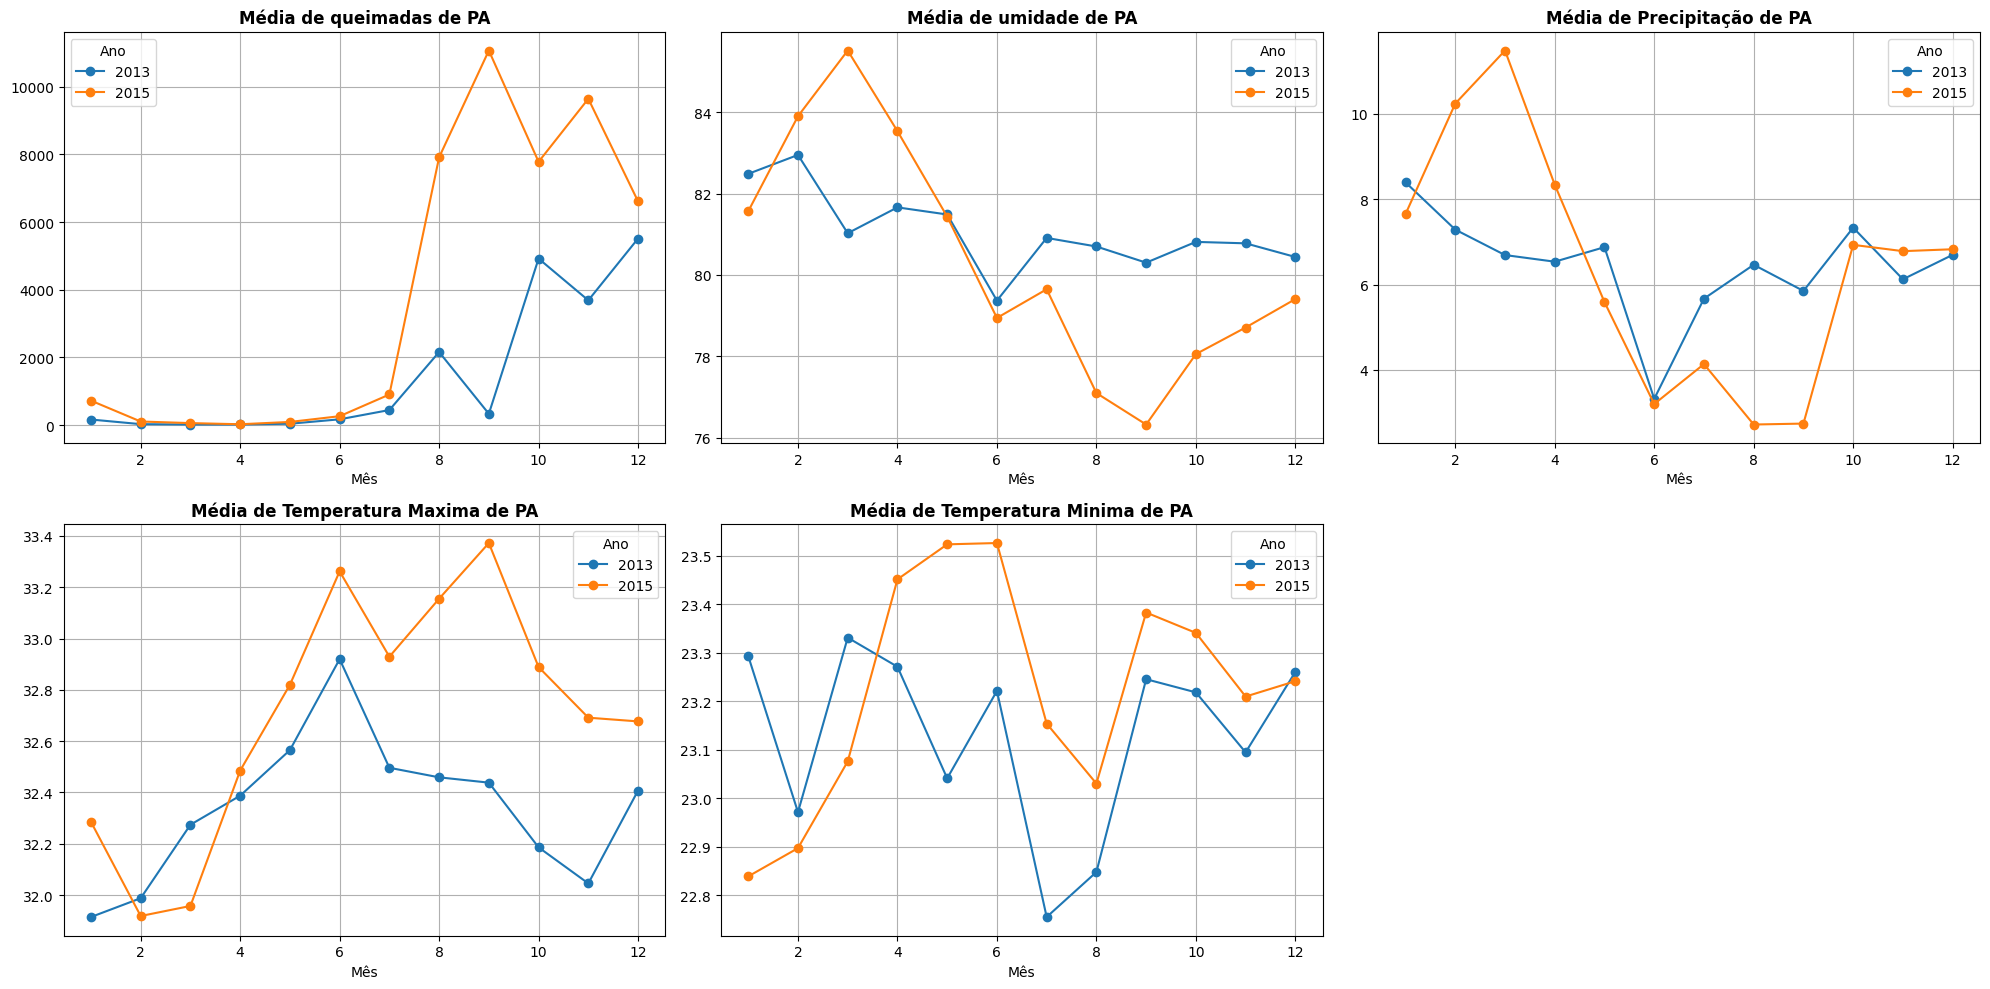

In [223]:
gerar_graficos(df_pa_2013, df_pa_2015)

##### Pernambuco (Nordeste)

In [ ]:
#Criando os DataFrames para o estado
df_pe_2013 = df[(df['Estado'] == 'PE') & (df['Ano'] == 2013)]
df_pe_2015 = df[(df['Estado'] == 'PE') & (df['Ano'] == 2015)]

In [234]:
gerar_correlacoes(df_pe_2013, 'Reds')

,TempMaxima,TempMinima,UmidadeRelativa,Precipitacao,QtQueimadas
TempMaxima,1.000000,0.881967,-0.847471,-0.675301,0.621235
TempMinima,0.881967,1.000000,-0.546774,-0.320961,0.317074
UmidadeRelativa,-0.847471,-0.546774,1.000000,0.844540,-0.641432
Precipitacao,-0.675301,-0.320961,0.844540,1.000000,-0.636460
QtQueimadas,0.621235,0.317074,-0.641432,-0.636460,1.000000


In [233]:
gerar_correlacoes(df_pe_2015, 'Purples')

,TempMaxima,TempMinima,UmidadeRelativa,Precipitacao,QtQueimadas
TempMaxima,1.000000,0.676221,-0.785420,-0.777848,0.878027
TempMinima,0.676221,1.000000,-0.249051,-0.189058,0.592097
UmidadeRelativa,-0.785420,-0.249051,1.000000,0.851130,-0.795487
Precipitacao,-0.777848,-0.189058,0.851130,1.000000,-0.638858
QtQueimadas,0.878027,0.592097,-0.795487,-0.638858,1.000000


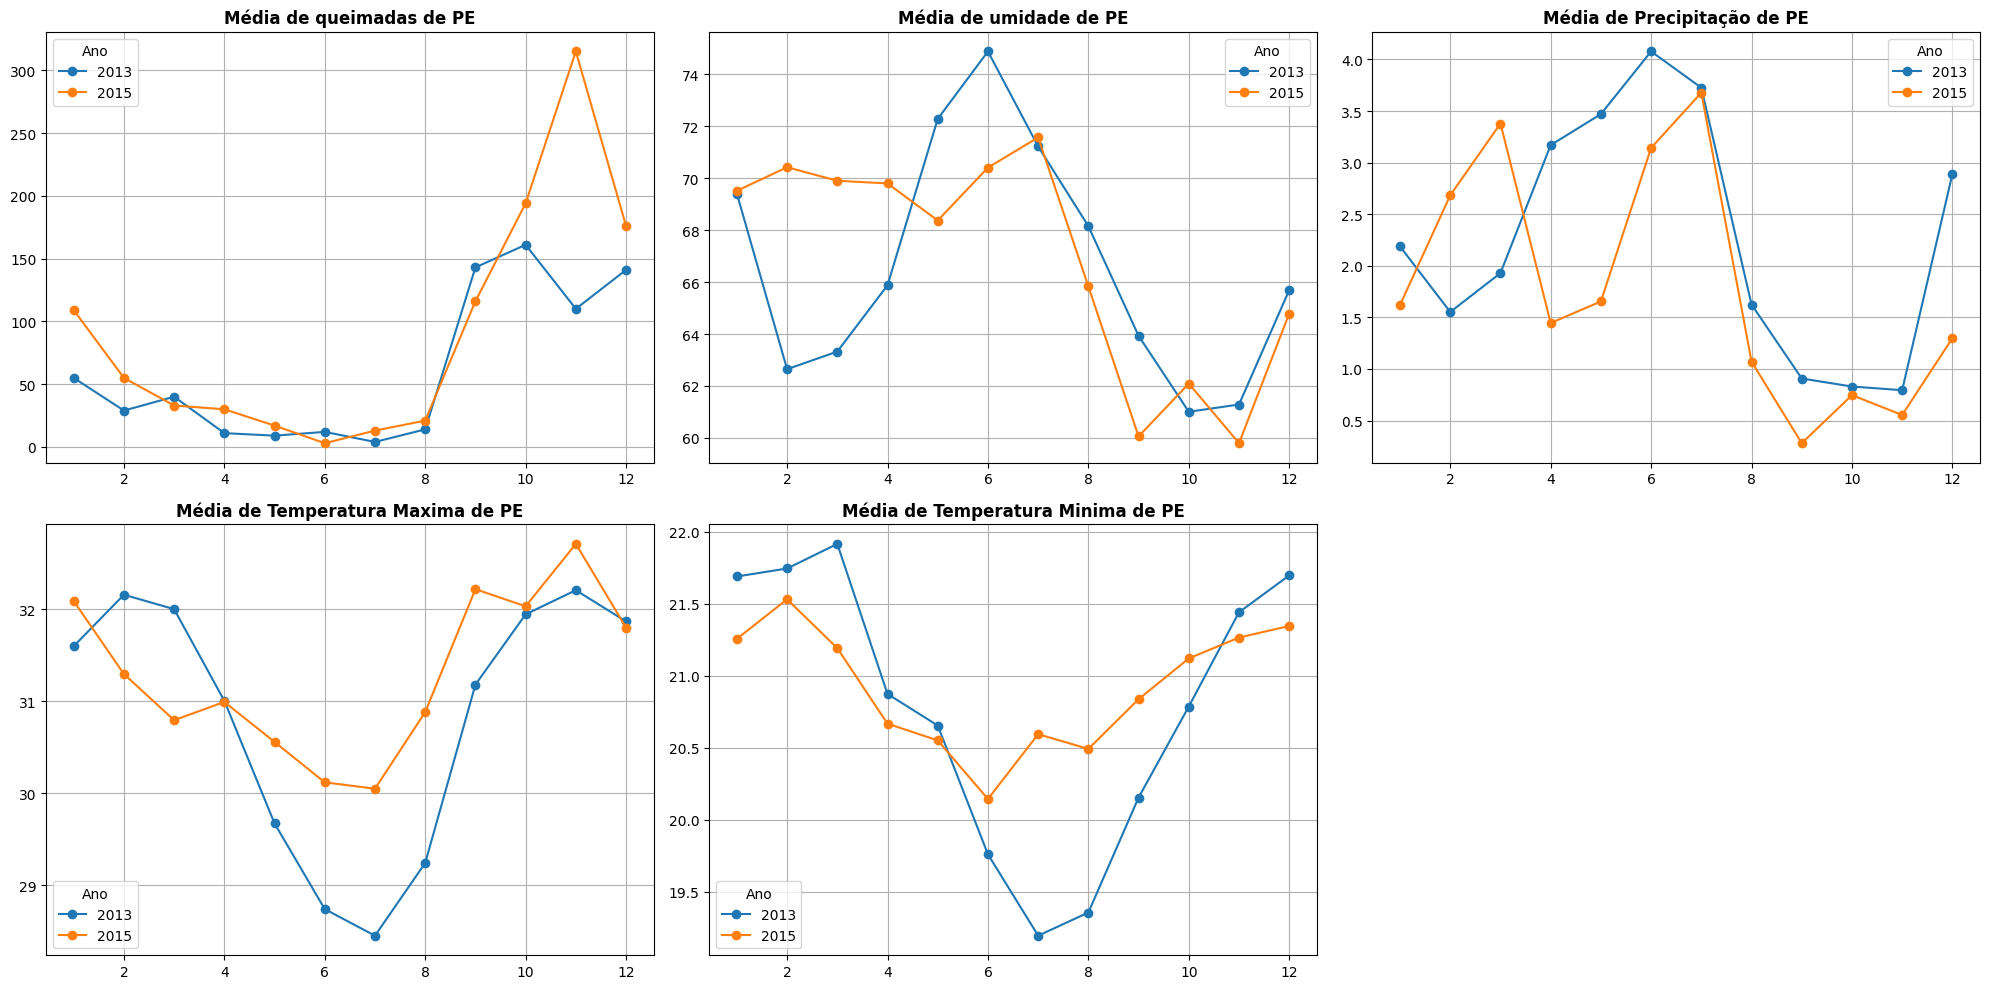

In [212]:
gerar_graficos(df_pe_2013, df_pe_2015)

##### Mato Grosso (Centro-Oeste)

In [ ]:
#Criando os DataFrames para o estado
df_mt_2013 = df[(df['Estado'] == 'MT') & (df['Ano'] == 2013)]
df_mt_2015 = df[(df['Estado'] == 'MT') & (df['Ano'] == 2015)]

In [237]:
gerar_correlacoes(df_mt_2013, 'Reds')

,TempMaxima,TempMinima,UmidadeRelativa,Precipitacao,QtQueimadas
TempMaxima,1.000000,-0.486630,-0.761762,-0.790732,0.705535
TempMinima,-0.486630,1.000000,0.895989,0.705992,-0.389447
UmidadeRelativa,-0.761762,0.895989,1.000000,0.872731,-0.618551
Precipitacao,-0.790732,0.705992,0.872731,1.000000,-0.356197
QtQueimadas,0.705535,-0.389447,-0.618551,-0.356197,1.000000


In [235]:
gerar_correlacoes(df_mt_2015, 'Purples')

,TempMaxima,TempMinima,UmidadeRelativa,Precipitacao,QtQueimadas
TempMaxima,1.000000,-0.016020,-0.523747,0.021525,0.800884
TempMinima,-0.016020,1.000000,0.283305,0.508018,0.050247
UmidadeRelativa,-0.523747,0.283305,1.000000,0.351459,-0.595231
Precipitacao,0.021525,0.508018,0.351459,1.000000,-0.148476
QtQueimadas,0.800884,0.050247,-0.595231,-0.148476,1.000000


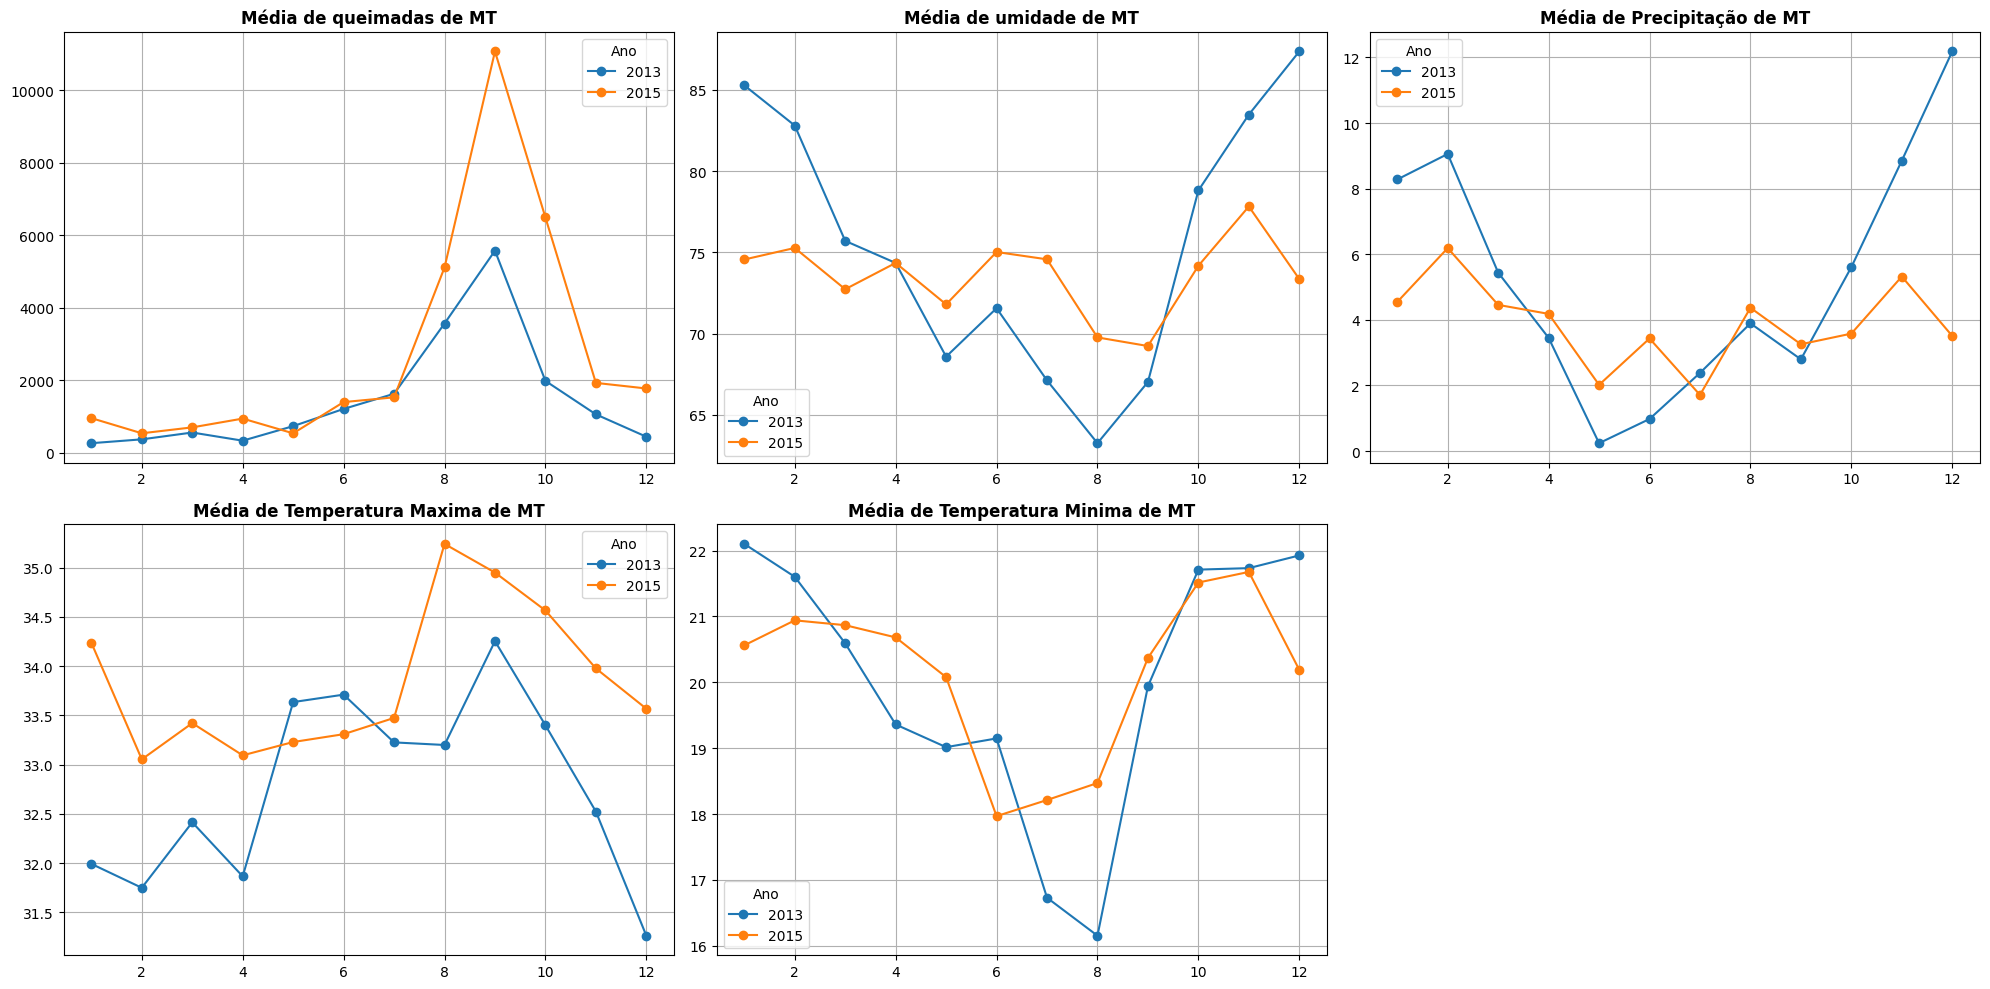

In [213]:
gerar_graficos(df_mt_2013, df_mt_2015)

##### São Paulo (Sudeste)

In [ ]:
#Criando os DataFrames para o estado
df_sp_2013 = df[(df['Estado'] == 'SP') & (df['Ano'] == 2013)]
df_sp_2015 = df[(df['Estado'] == 'SP') & (df['Ano'] == 2015)]

In [238]:
gerar_correlacoes(df_sp_2013, 'Reds')

,TempMaxima,TempMinima,UmidadeRelativa,Precipitacao,QtQueimadas
TempMaxima,1.000000,0.812653,0.024812,0.638047,-0.040238
TempMinima,0.812653,1.000000,0.561522,0.846403,-0.509225
UmidadeRelativa,0.024812,0.561522,1.000000,0.538009,-0.913105
Precipitacao,0.638047,0.846403,0.538009,1.000000,-0.452998
QtQueimadas,-0.040238,-0.509225,-0.913105,-0.452998,1.000000


In [239]:
gerar_correlacoes(df_sp_2015, 'Purples')

,TempMaxima,TempMinima,UmidadeRelativa,Precipitacao,QtQueimadas
TempMaxima,1.000000,0.762855,-0.466183,0.247367,0.264728
TempMinima,0.762855,1.000000,0.083834,0.704229,-0.217994
UmidadeRelativa,-0.466183,0.083834,1.000000,0.485310,-0.905041
Precipitacao,0.247367,0.704229,0.485310,1.000000,-0.351710
QtQueimadas,0.264728,-0.217994,-0.905041,-0.351710,1.000000


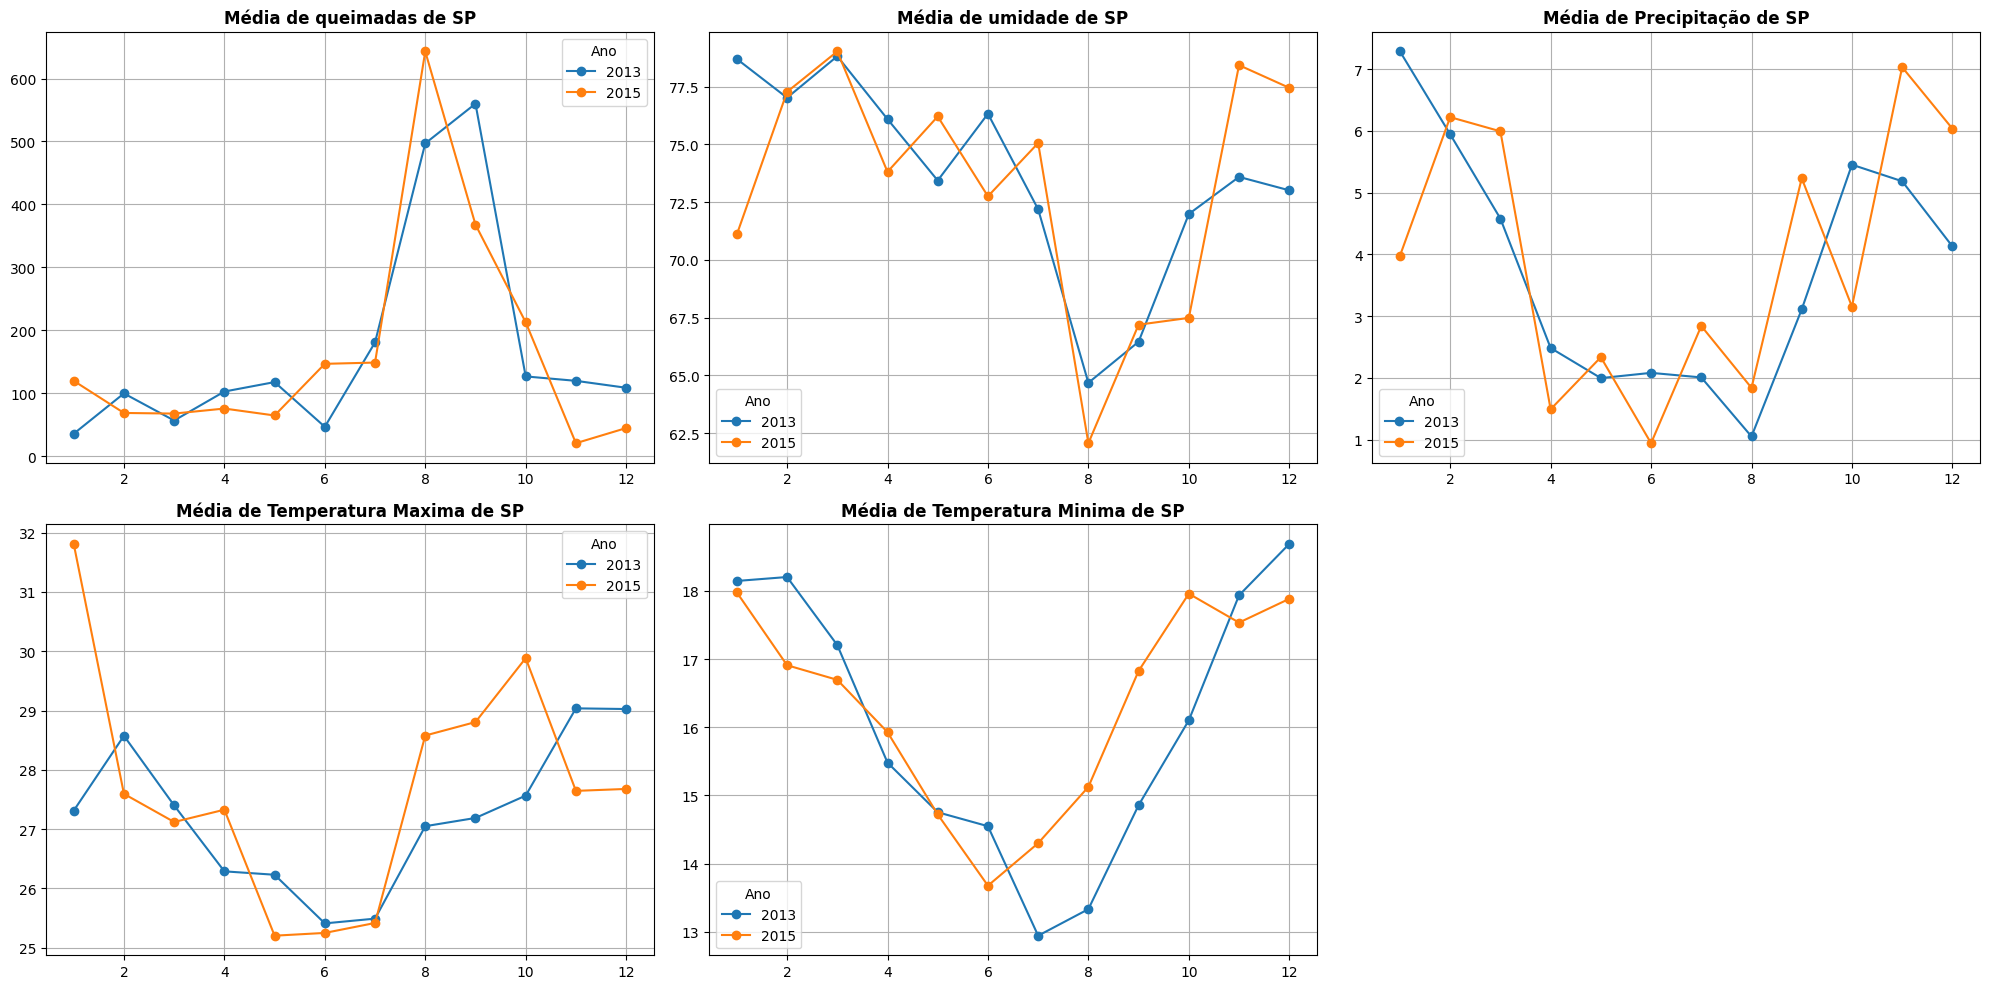

In [214]:
gerar_graficos(df_sp_2013, df_sp_2015)

##### Santa Catarina (Sul)

In [ ]:
#Criando os DataFrames para o estado
df_sc_2013 = df[(df['Estado'] == 'SC') & (df['Ano'] == 2013)]
df_sc_2015 = df[(df['Estado'] == 'SC') & (df['Ano'] == 2015)]

In [240]:
gerar_correlacoes(df_sc_2013, 'Reds')

,TempMaxima,TempMinima,UmidadeRelativa,Precipitacao,QtQueimadas
TempMaxima,1.000000,0.923301,-0.729416,-0.233342,-0.583539
TempMinima,0.923301,1.000000,-0.444622,-0.228139,-0.729679
UmidadeRelativa,-0.729416,-0.444622,1.000000,0.288329,0.236896
Precipitacao,-0.233342,-0.228139,0.288329,1.000000,0.347588
QtQueimadas,-0.583539,-0.729679,0.236896,0.347588,1.000000


In [241]:
gerar_correlacoes(df_sc_2015, 'Purples')

,TempMaxima,TempMinima,UmidadeRelativa,Precipitacao,QtQueimadas
TempMaxima,1.000000,0.966920,-0.650665,-0.065963,-0.344138
TempMinima,0.966920,1.000000,-0.519625,0.085387,-0.473527
UmidadeRelativa,-0.650665,-0.519625,1.000000,0.369548,-0.277208
Precipitacao,-0.065963,0.085387,0.369548,1.000000,-0.433888
QtQueimadas,-0.344138,-0.473527,-0.277208,-0.433888,1.000000


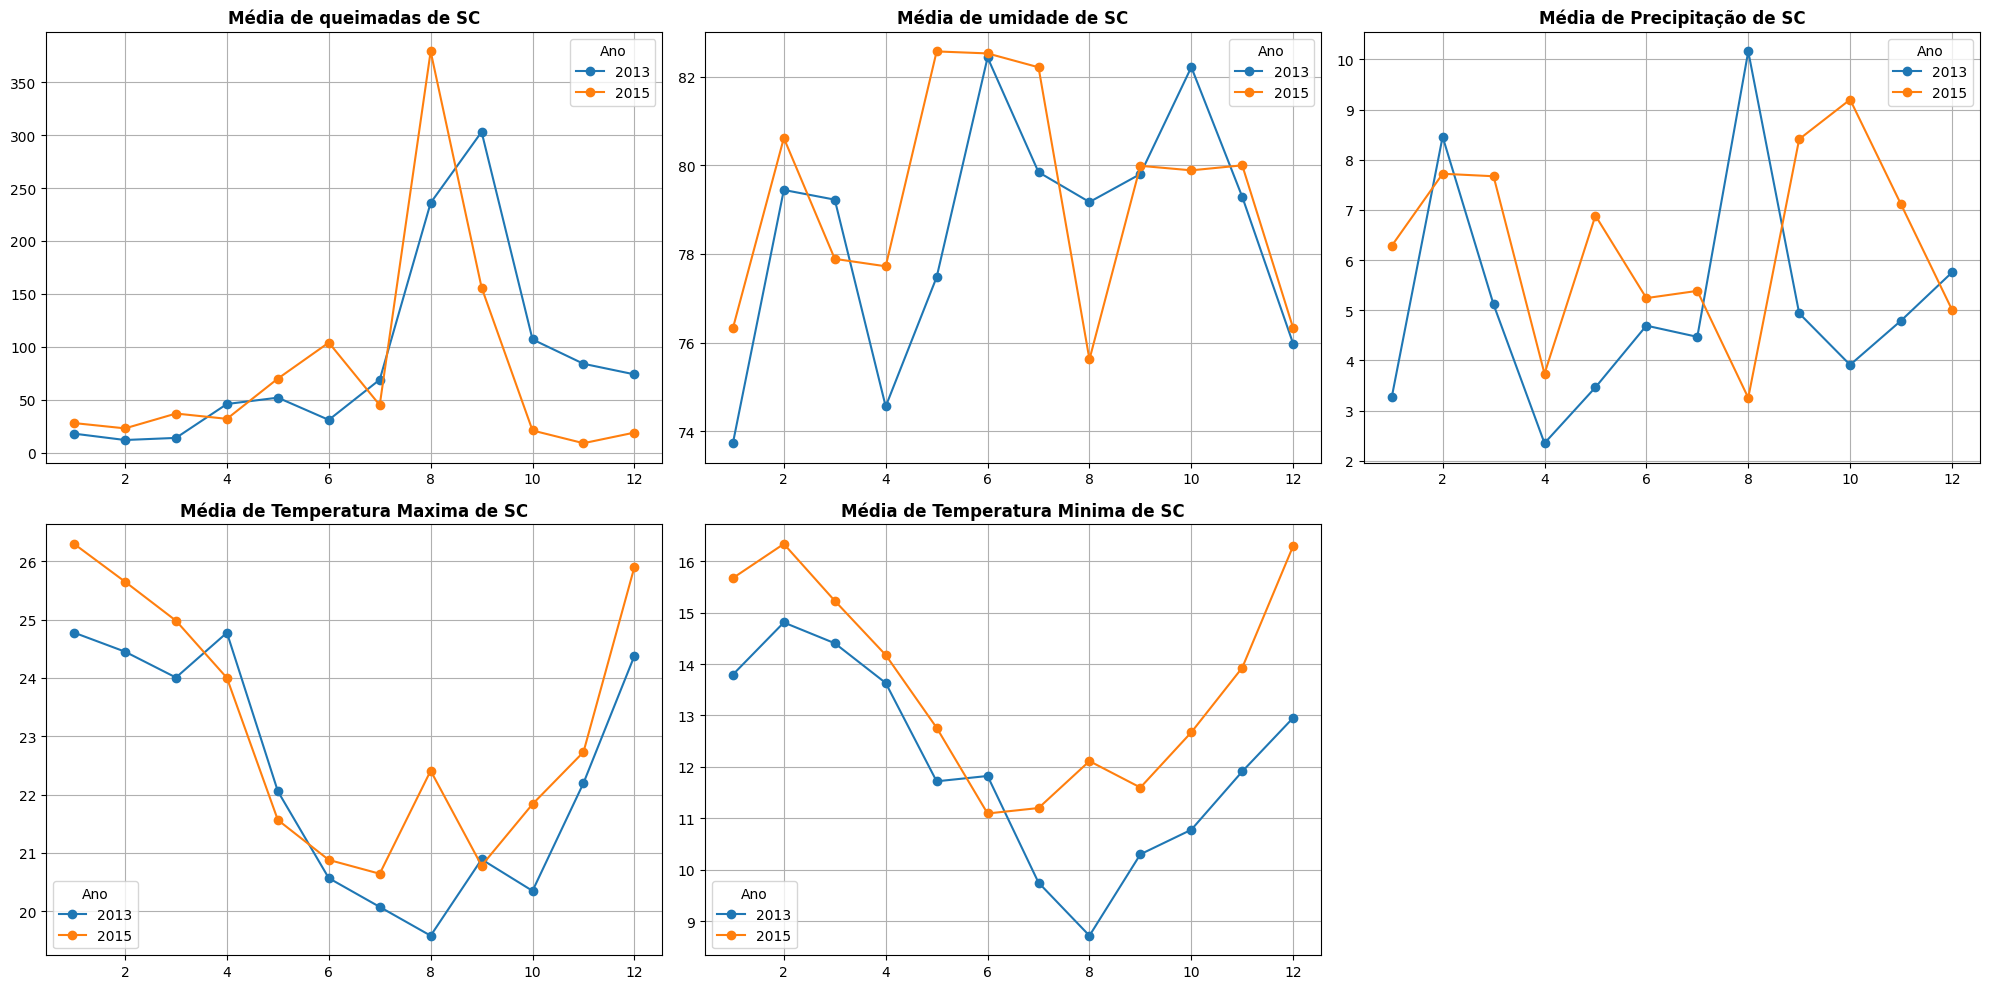

In [215]:
gerar_graficos(df_sc_2013, df_sc_2015)

#### Séries Temporais

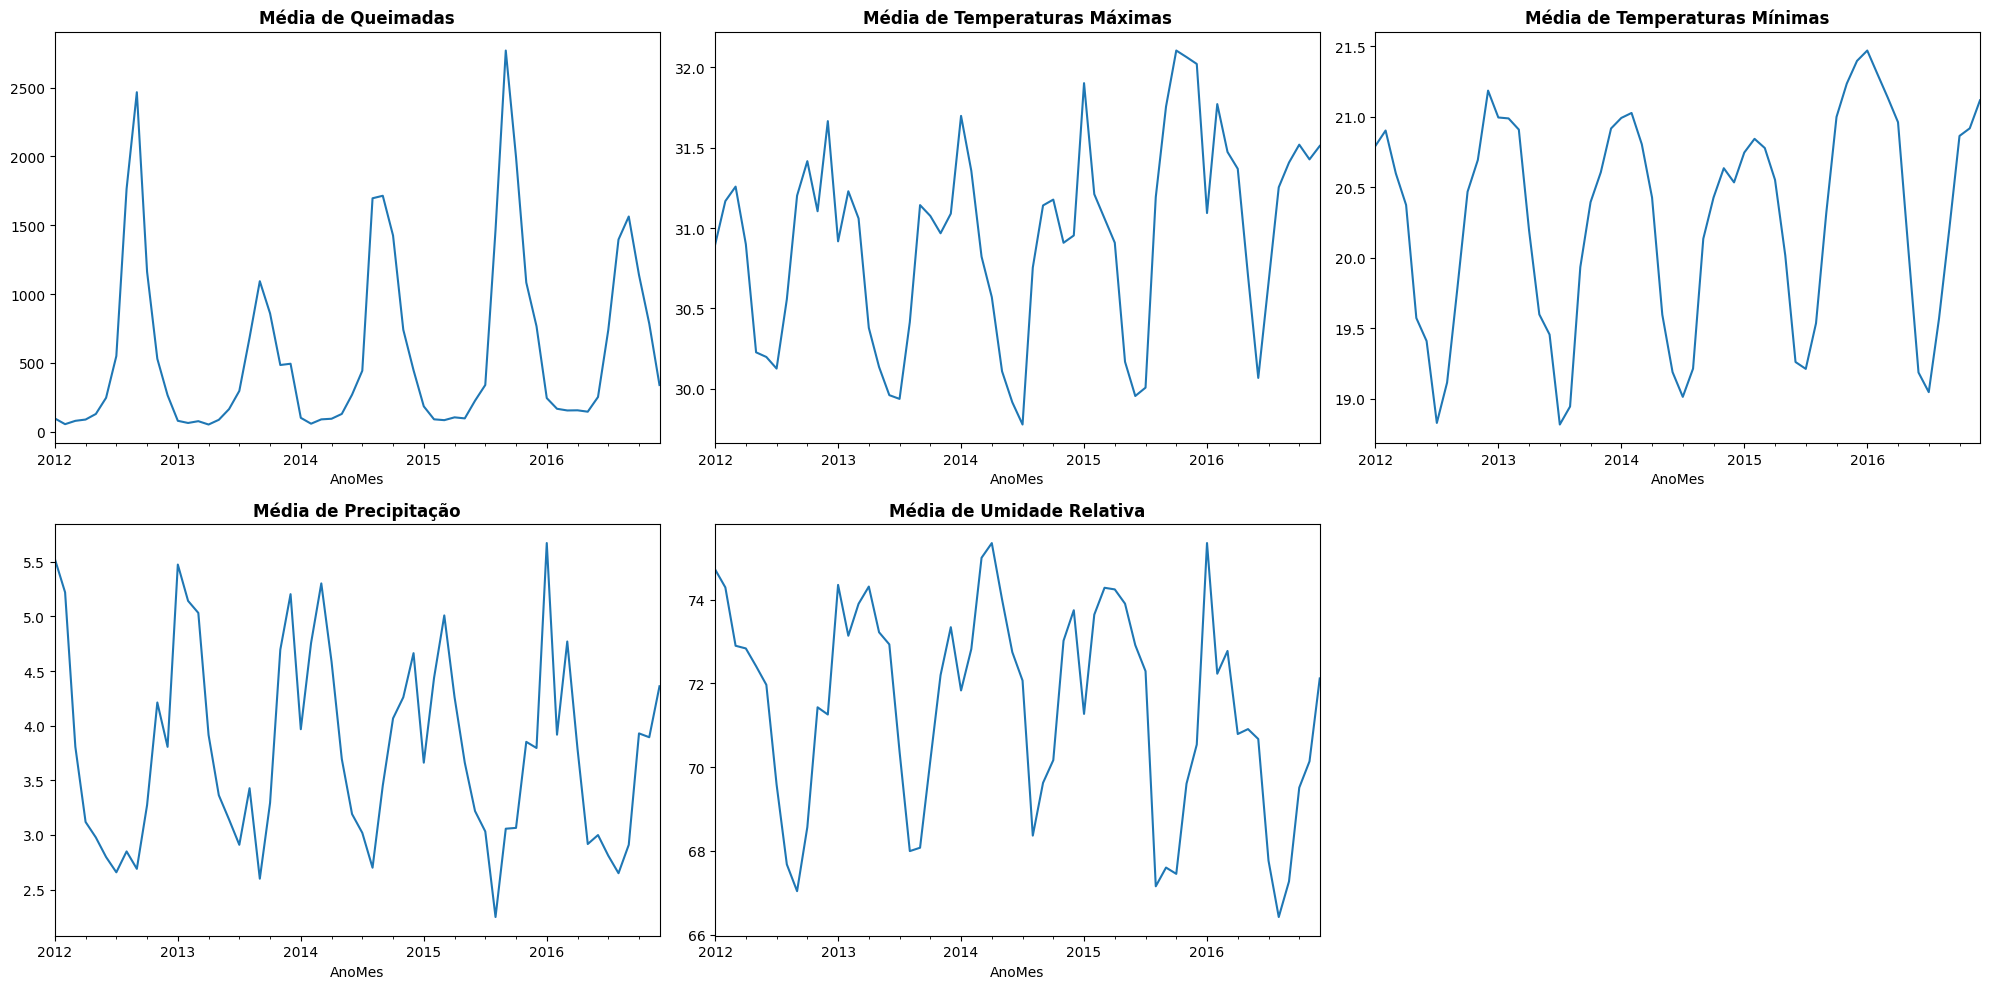

In [ ]:
#Plotandos os gráficos das Séries temporais

fig = plt.figure(figsize=(20,10))
#Queimadas
plt.subplot(2, 3, 1)
plt.title('Média de Queimadas', fontsize=12, weight='bold')
df.groupby(['AnoMes'])['QtQueimadas'].mean().plot()
#Temperatura Máxima
plt.subplot(2, 3, 2)
plt.title('Média de Temperaturas Máximas', fontsize=12, weight='bold')
df.groupby(['AnoMes'])['TempMaxima'].mean().plot()
#Temperatura Mínima
plt.subplot(2, 3, 3)
plt.title('Média de Temperaturas Mínimas', fontsize=12, weight='bold')
df.groupby(['AnoMes'])['TempMinima'].mean().plot()
#Precipitação
plt.subplot(2, 3, 4)
plt.title('Média de Precipitação', fontsize=12, weight='bold')
df.groupby(['AnoMes'])['Precipitacao'].mean().plot()
#Umidade Relativa
plt.subplot(2, 3, 5)
plt.title('Média de Umidade Relativa', fontsize=12, weight='bold')
df.groupby(['AnoMes'])['UmidadeRelativa'].mean().plot()

plt.tight_layout()
plt.show()

#### Análise de Variância

In [ ]:
modelo = ols('QtQueimadas ~ Estado', data=df).fit()
anova_table = sm.stats.anova_lm(modelo, typ=2)

In [ ]:
anova_table

,sum_sq,df,F,PR(>F)
Estado,7.613714e+08,22.0,23.652726,3.878474e-80
Residual,1.985512e+09,1357.0,NaN,NaN
